## 导入包

In [6]:
import bt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 载入数据

In [8]:
data = bt.get('spy,agg', start='2023-01-01')

In [9]:
data.head()

,spy,agg
Date,,
2023-01-03,373.956787,93.347343
2023-01-04,376.843811,93.864021
2023-01-05,372.542755,93.787468
2023-01-06,381.085938,94.811256
2023-01-09,380.869934,95.050461


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 368 entries, 2023-01-03 to 2024-06-20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spy     368 non-null    float64
 1   agg     368 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


> 关注数据格式，index列为DatetimeIndex

## 创建策略

In [11]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

> 创建策略的代码解读
> s1 是策略姓名，后面一个list格式说明策略内容：

> 1. bt.algos.RunMonthly(): 指定策略应该每月运行一次。(可以按天，按月，按季，按年，一次性，指定日期等等）
> 2. bt.algos.SelectAll(): 这个算法选择策略中的所有可用资产进行交易
> 3. bt.algos.WeighEqually(): 这个算法确保策略中的所有资产被等权重分配。
> 4. bt.algos.Rebalance(): 这个算法指示策略在每个运行周期（这里是每月）结束时重新平衡投资组合，以确保资产保持等权重分配

In [12]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

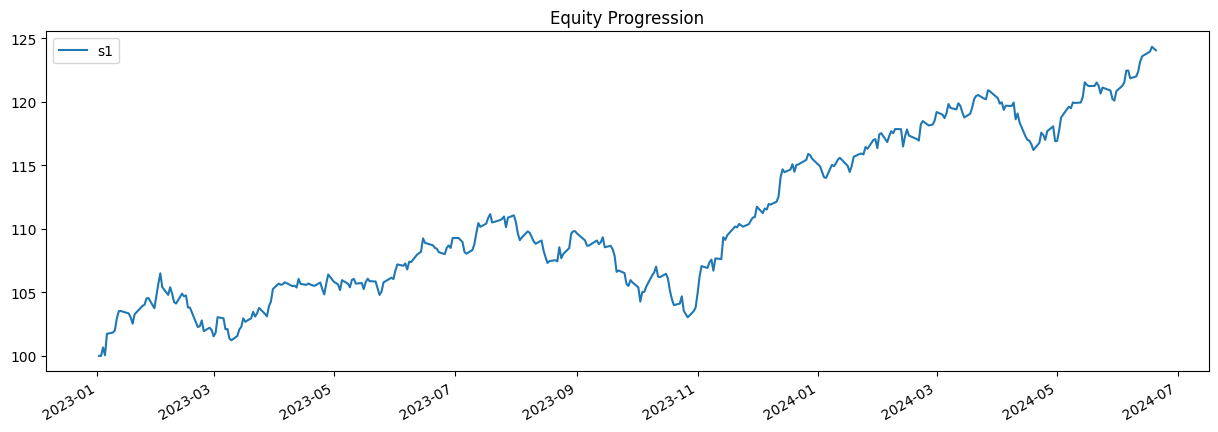

In [38]:
# first let's see an equity curve
res.plot();

In [39]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2023-01-02
End                  2024-06-20
Risk-free rate       0.00%

Total Return         24.04%
Daily Sharpe         1.96
Daily Sortino        3.61
CAGR                 15.84%
Max Drawdown         -7.31%
Calmar Ratio         2.17

MTD                  2.65%
3m                   3.19%
6m                   8.35%
YTD                  7.39%
1Y                   14.11%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  15.84%

Daily Sharpe         1.96
Daily Sortino        3.61
Daily Mean (ann.)    15.05%
Daily Vol (ann.)     7.70%
Daily Skew           0.05
Daily Kurt           0.35
Best Day             1.69%
Worst Day            -1.48%

Monthly Sharpe       1.26
Monthly Sortino      2.83
Monthly Mean (ann.)  12.46%
Monthly Vol (ann.)   9.90%
Monthly Skew         -0.01
Monthly Kurt         -0.37
Best Month           6.86%
Worst Month          -3.66%

Yearly Sharpe        -


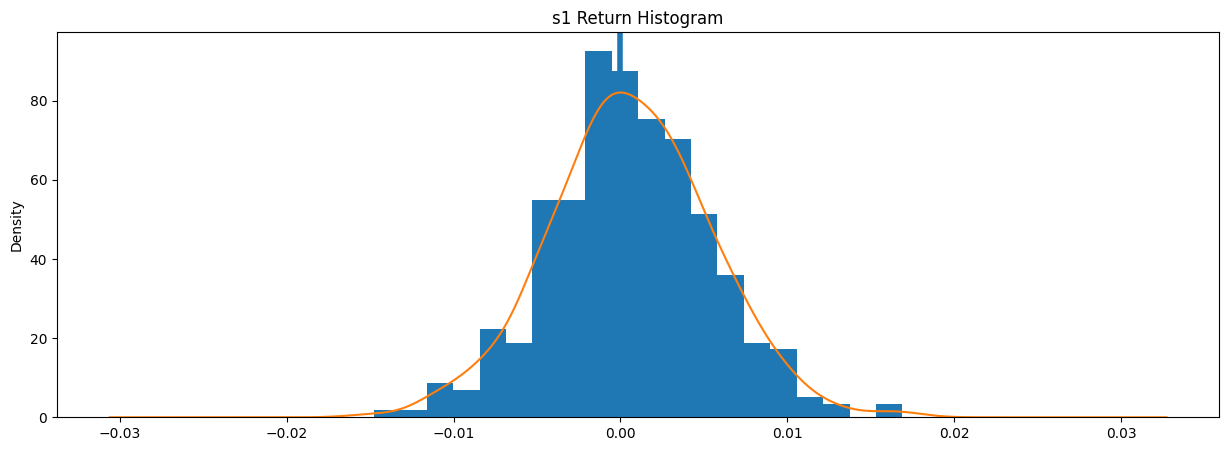

In [25]:
# ok and how does the return distribution look like?
res.plot_histogram()

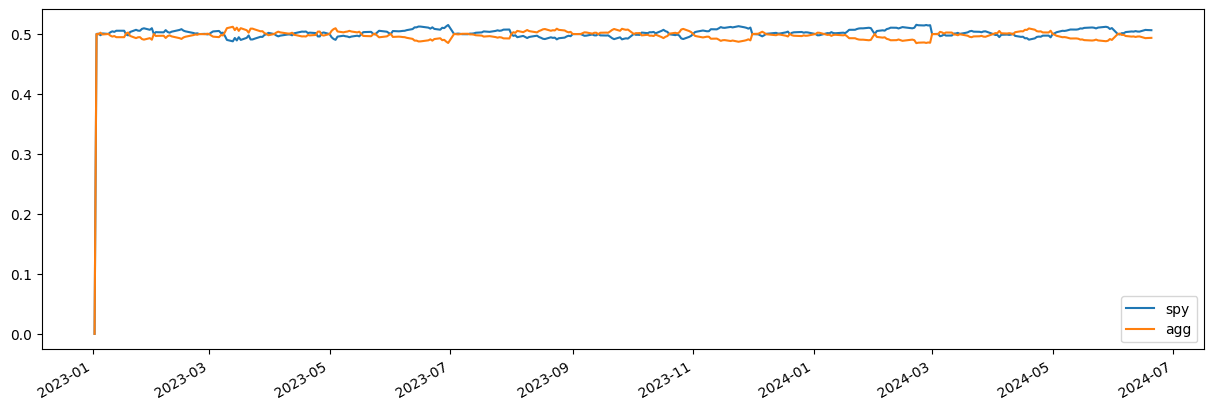

In [26]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

## 在原策略基础上增加混合策略

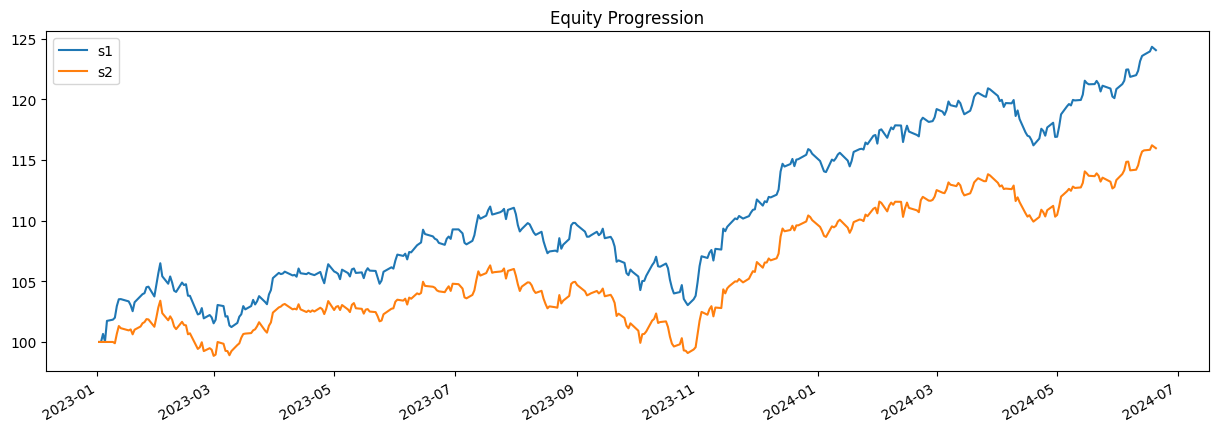

In [15]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.

test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

In [16]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2023-01-02  2023-01-02
End                  2024-06-20  2024-06-20
Risk-free rate       0.00%       0.00%

Total Return         24.04%      15.96%
Daily Sharpe         1.96        1.53
Daily Sortino        3.61        2.72
CAGR                 15.84%      10.64%
Max Drawdown         -7.31%      -6.79%
Calmar Ratio         2.17        1.57

MTD                  2.65%       2.31%
3m                   3.19%       2.49%
6m                   8.35%       6.20%
YTD                  7.39%       5.38%
1Y                   14.11%      10.92%
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  15.84%      10.64%

Daily Sharpe         1.96        1.53
Daily Sortino        3.61        2.72
Daily Mean (ann.)    15.05%      10.37%
Daily Vol (ann.)     7.70%       6.76%
Daily Skew           0.05        -0.03
Daily Kurt           